# TASK 1


TITANIC SURVIVAL PREDICTION

Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')  # or your file path
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


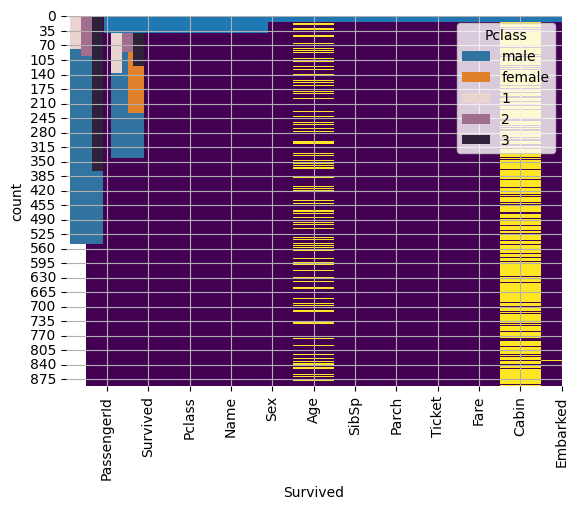

In [ ]:
# Check info and summary
df.info()
df.describe()
df.isnull().sum()

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Survival count
sns.countplot(x='Survived', data=df)

# Survival by sex
sns.countplot(x='Survived', hue='Sex', data=df)

# Survival by class
sns.countplot(x='Survived', hue='Pclass', data=df)

# Age distribution
df['Age'].hist(bins=20)


In [6]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many nulls), Name, Ticket
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

df.head()


/tmp/ipython-input-6-2999993819.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-6-2999993819.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [7]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

Accuracy: 0.8435754189944135
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.85      0.76      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



<Axes: >

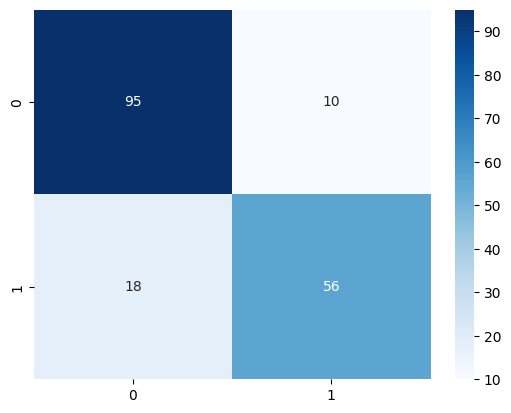

In [8]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')


In [9]:
# Create a copy of the test set
X_test_copy = X_test.copy()

# Add actual and predicted survival values
X_test_copy['Actual_Survived'] = y_test.values
X_test_copy['Predicted_Survived'] = y_pred

# Add interpretation column
X_test_copy['Prediction_Result'] = X_test_copy['Predicted_Survived'].apply(lambda x: 'Survived' if x == 1 else 'Not Survived')

# Show first few rows
X_test_copy.head(10)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Actual_Survived,Predicted_Survived,Prediction_Result
709,710,3,1,28.0,1,1,15.2458,0,1,0,Not Survived
439,440,2,1,31.0,0,0,10.5000,2,0,0,Not Survived
840,841,3,1,20.0,0,0,7.9250,2,0,0,Not Survived
720,721,2,0,6.0,0,1,33.0000,2,1,1,Survived
39,40,3,0,14.0,1,0,11.2417,0,1,0,Not Survived
290,291,1,0,26.0,0,0,78.8500,2,1,1,Survived
300,301,3,0,28.0,0,0,7.7500,1,1,1,Survived
333,334,3,1,16.0,2,0,18.0000,2,0,0,Not Survived
208,209,3,0,16.0,0,0,7.7500,1,1,1,Survived
136,137,1,0,19.0,0,2,26.2833,2,1,1,Survived


In [10]:
X_test_copy.to_csv('titanic_predictions_output.csv', index=False)


In [11]:
from google.colab import files
files.download('titanic_predictions_output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>